# Exploratory Data Analysis (Part 1 of 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time

# Bitcoin

Let's start with the price of Bitcoin, measured by the Bitcoin Price Index.

In [54]:
btc = pd.read_csv('bpi.csv')

In [55]:
def str_to_time(elem):
    day = datetime.datetime.strptime(elem, '%Y-%m-%d')
    return day

btc['Date'] = btc['Date'].apply(str_to_time)
btc = btc.set_index('Date')

In [56]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

Text(0, 0.5, 'Price in USD')

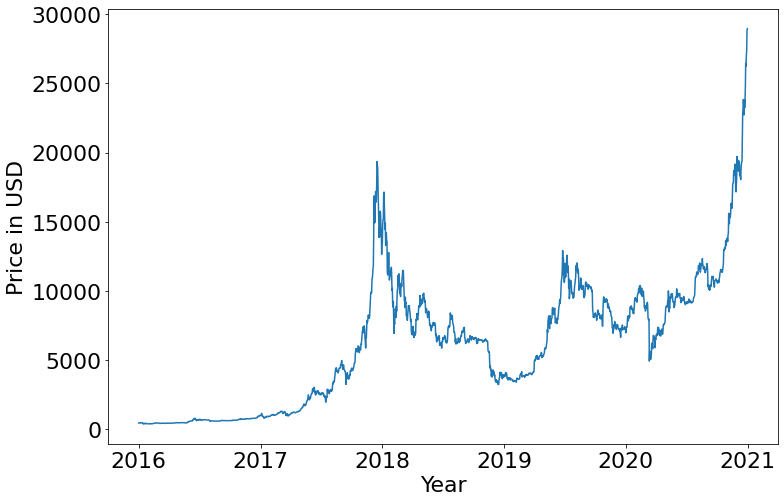

In [58]:
fig = plt.figure(figsize=(12,8))
plt.plot(btc['BPI'])#, btc['BPI'])
#plt.title('The price of Bitcoin in USD')
plt.xlabel('Year')
plt.ylabel('Price in USD')


Text(0, 0.5, 'Price in USD (log scale)')

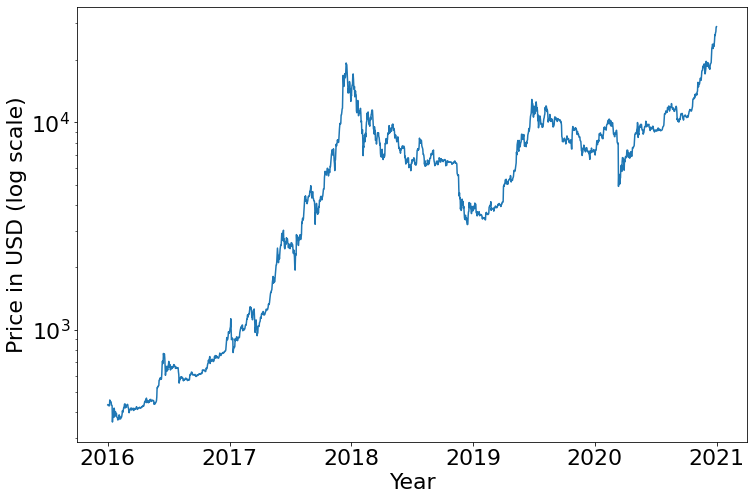

In [59]:
fig = plt.figure(figsize=(12,8))
plt.plot(btc['BPI'])
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Price in USD (log scale)')

So, what can be learned so far? 
- A relatively boring period until beginning of 2017, then a wild ride with rapid increase until the beginning of 2018.
- Bitcoin hit an ATH
- Then, a very rapid fallback, followed by a long and sustained period of declining prices.
- Some ground was won during 2019.
- A bumpy ride in 2019 - 2020, but a huge spike towards the end of 2021.

This is probably important to know for the rest of the analysis.

# Final Dataset

In [7]:
df = pd.read_csv('df_final.csv')

In [8]:
df

,id,timestamp,author,score,comments,title,text,Time,Day
0,3yyux2,1451606523,HodlDwon,1,0,Toomim BTCC Comment,NaN,2016-01-01 00:02:03,2016-01-01
1,3yyvmp,1451606917,[deleted],63,149,They think Satoshi was wrong,[deleted],2016-01-01 00:08:37,2016-01-01
2,3yyx1b,1451607665,Bonleta,6,0,Bitcoin crowned best-performing currency of 2015,NaN,2016-01-01 00:21:05,2016-01-01
3,3yyyoz,1451608583,wakka54,2,3,If there an automated program to search a hard...,I remember mining in 2010 but quit because it ...,2016-01-01 00:36:23,2016-01-01
4,3yyyqr,1451608613,camponez,1,3,Happy New 2016 FIAT!,NaN,2016-01-01 00:36:53,2016-01-01
...,...,...,...,...,...,...,...,...,...
574618,ko0wkc,1609458770,BitcoinIsEasy,1,0,Look like for Idiots but its Amazing,NaN,2020-12-31 23:52:50,2020-12-31
574619,ko0xpi,1609458893,idknooneknowsme,1,5,How to recover bitcoin,"So I’m actually not a n00b at all, I’m holding...",2020-12-31 23:54:53,2020-12-31
574620,ko0ycw,1609458963,Independent-Front860,1,0,"Defending Japan, the land of Satoshi Nakamoto ...",NaN,2020-12-31 23:56:03,2020-12-31
574621,ko0yoo,1609458998,18gorrillas,1,1,I hear “down the rabbit hole” all the time.......,NaN,2020-12-31 23:56:38,2020-12-31


In [9]:
df['id'] = df['id'].astype(str)
df['timestamp'] = df['timestamp'].astype(int)
df['author'] = df['author'].astype(str)
df['score'] = df['score'].astype(int)
df['comments'] = df['comments'].astype(int)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = pd.to_datetime(df['Day'])

In [10]:
df

,id,timestamp,author,score,comments,title,text,Time,Day
0,3yyux2,1451606523,HodlDwon,1,0,Toomim BTCC Comment,nan,2016-01-01 00:02:03,2016-01-01
1,3yyvmp,1451606917,[deleted],63,149,They think Satoshi was wrong,[deleted],2016-01-01 00:08:37,2016-01-01
2,3yyx1b,1451607665,Bonleta,6,0,Bitcoin crowned best-performing currency of 2015,nan,2016-01-01 00:21:05,2016-01-01
3,3yyyoz,1451608583,wakka54,2,3,If there an automated program to search a hard...,I remember mining in 2010 but quit because it ...,2016-01-01 00:36:23,2016-01-01
4,3yyyqr,1451608613,camponez,1,3,Happy New 2016 FIAT!,nan,2016-01-01 00:36:53,2016-01-01
...,...,...,...,...,...,...,...,...,...
574618,ko0wkc,1609458770,BitcoinIsEasy,1,0,Look like for Idiots but its Amazing,nan,2020-12-31 23:52:50,2020-12-31
574619,ko0xpi,1609458893,idknooneknowsme,1,5,How to recover bitcoin,"So I’m actually not a n00b at all, I’m holding...",2020-12-31 23:54:53,2020-12-31
574620,ko0ycw,1609458963,Independent-Front860,1,0,"Defending Japan, the land of Satoshi Nakamoto ...",nan,2020-12-31 23:56:03,2020-12-31
574621,ko0yoo,1609458998,18gorrillas,1,1,I hear “down the rabbit hole” all the time.......,nan,2020-12-31 23:56:38,2020-12-31


# Score

Text(0, 0.5, 'Score')

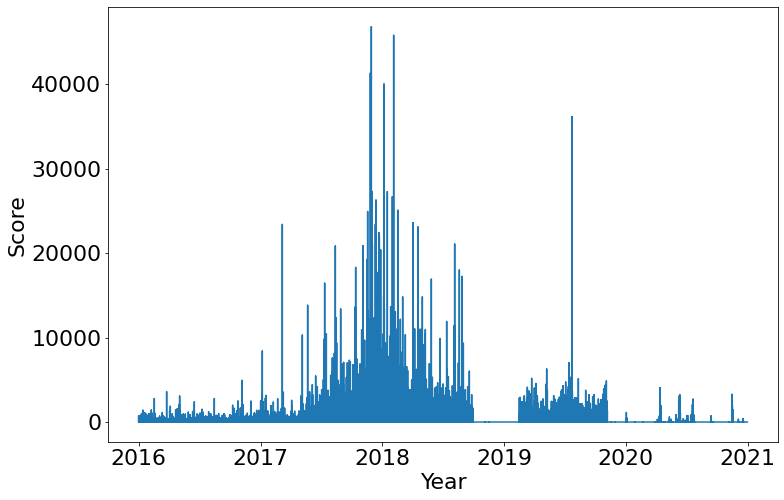

In [11]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['Day'], df['score'])
plt.xlabel('Year')
plt.ylabel('Score')

There is a huge problem here. 
- Crawler is not accurate
- Score can change over time
- most recent threads are very inaccurate
- Older threads are mroe accurate
- Open issue on GitHub

# Comments

Text(0, 0.5, 'Comments')

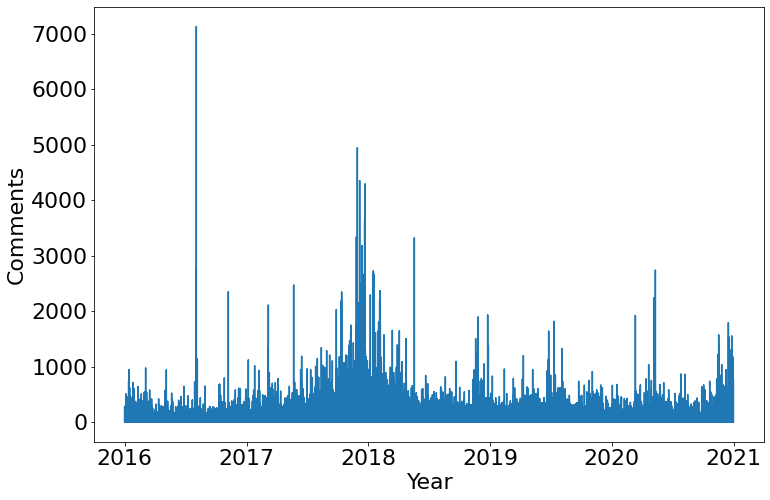

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['Day'], df['comments'])
plt.xlabel('Year')
plt.ylabel('Comments')

Much more accurate, but a few things to be mentioned:
- The one spike in 2016 is a total outlier. 
- Should be treated with caution.
- One can observe a co-movement with the price of bitcoin to a certain extent.
- However, in the end it gets inaccurate.
- Could be because there is still discussion going on, the crawler hasn't updated yet
- Neverthelesss, the comments seem to be of better reliability than the scores

# Authors

In [140]:
df['author'].value_counts()

[deleted]           46343
ms3776500            1703
cryptodailynews      1643
Daveliuz             1522
firecrypto           1470
                    ...  
snowplusbrd             1
vivek2904               1
BreakingB4D             1
PleaseW84myRX8          1
zachisradical420        1
Name: author, Length: 170527, dtype: int64

In [143]:
df['author'].value_counts()[0]/df['author'].value_counts().sum()

0.08064939969336417

In [14]:
# So, most comments come from accounts that are already deleted. What happens if we take them out? 

In [15]:
author_df = df[df['author'] != '[deleted]']['author']

In [16]:
counts_df = author_df.value_counts().value_counts()

In [17]:
cdf = counts_df.sort_index()
cdf = cdf.reset_index()
cdf = cdf.rename(columns={'index':'Threads'})

In [18]:
cdf

,Threads,author
0,1,111170
1,2,25181
2,3,10557
3,4,5733
4,5,3587
...,...,...
275,1450,1
276,1470,1
277,1522,1
278,1643,1


In [19]:
cdf['total_threads'] = cdf['Threads'] * cdf['author']

cumulative = []
threads = 0
totals = cdf['total_threads'].sum()
for i in range(cdf.shape[0]):
    threads += cdf['total_threads'].iloc[i]
    cumulative.append(threads / totals)
cdf['cumulative'] = cumulative    

In [20]:
cdf[cdf['Threads']==8]

,Threads,author,total_threads,cumulative
7,8,1280,10240,0.513523


In [21]:
ca = []
cap = []
captot = cdf['author'].sum()
cas = 0
for i in range(cdf.shape[0]):
    cas += cdf['author'].iloc[i]
    ca.append(cas)
    cap.append(cas/captot)

cdf['cumulative_authors'] = ca
cdf['cumulative_authors_pct'] = cap
cdf

,Threads,author,total_threads,cumulative,cumulative_authors,cumulative_authors_pct
0,1,111170,111170,0.210438,111170,0.651924
1,2,25181,50362,0.305770,136351,0.799591
2,3,10557,31671,0.365721,146908,0.861499
3,4,5733,22932,0.409130,152641,0.895119
4,5,3587,17935,0.443079,156228,0.916154
...,...,...,...,...,...,...
275,1450,1,1450,0.988003,170522,0.999977
276,1470,1,1470,0.990785,170523,0.999982
277,1522,1,1522,0.993666,170524,0.999988
278,1643,1,1643,0.996776,170525,0.999994


In [22]:
pd.DataFrame(cdf[cdf['cumulative']>= 0.5].iloc[0]).transpose()

,Threads,author,total_threads,cumulative,cumulative_authors,cumulative_authors_pct
7,8.0,1280.0,10240.0,0.513523,161707.0,0.948284


In [23]:
1 - cdf['cumulative'].iloc[-10]

0.024884530930567084

Text(0, 0.5, 'Number of Authors')

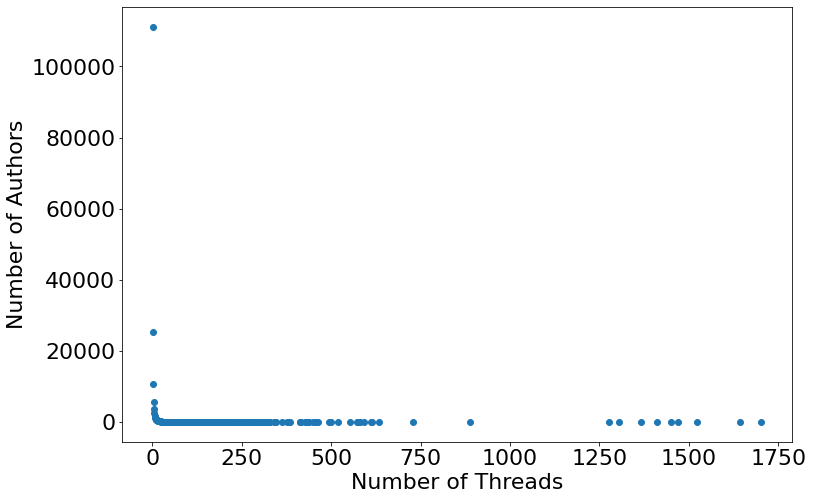

In [24]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['Threads'], cdf['author'])
plt.xlabel('Number of Threads')
plt.ylabel('Number of Authors')

Text(0, 0.5, 'Cumulative Percentage')

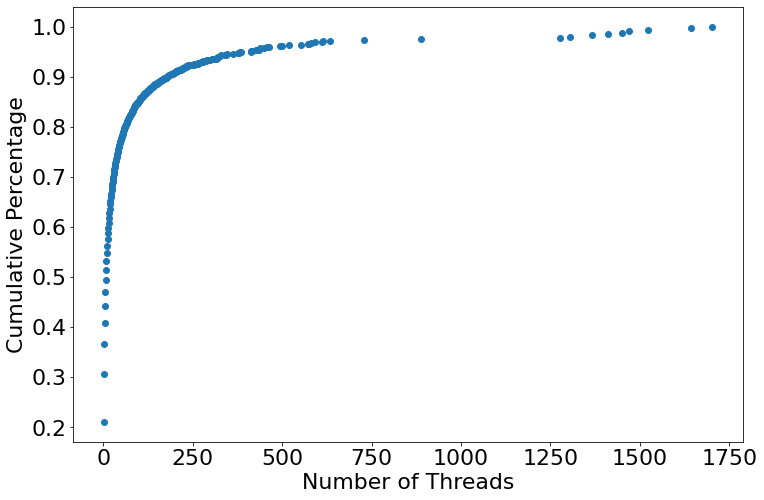

In [25]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['Threads'], cdf['cumulative'])
plt.xlabel('Number of Threads')
plt.ylabel('Cumulative Percentage')

Text(0, 0.5, 'Cumulative Threads')

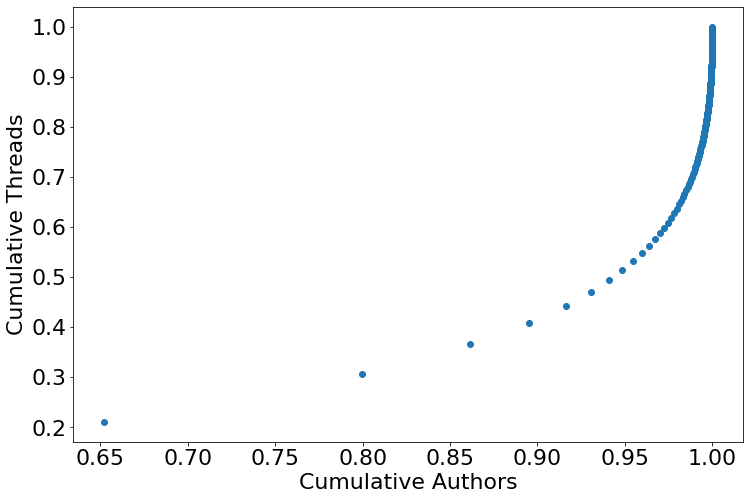

In [26]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['cumulative_authors_pct'], cdf['cumulative'])
plt.xlabel('Cumulative Authors')
plt.ylabel('Cumulative Threads')

What can be learned from here: 
- Highly skewed distribution, a few authors that write a lot, but the bulk writes only one or two threads
- Majority of threads comes from people that write few posts
- roughly 50% comes from people writing up to 8 posts in total
- very democratic so to speak
- The top 10 of authors in terms of frequency only write around 2.5% of total threads, not that much!

In [27]:
# What else

In [28]:
# Take the top 10 and check how their commenting activity developed. 

# Threads in total per day

In [29]:
day_df = pd.DataFrame(df.groupby('Day').count()['id'])
day_df = day_df.rename(columns={'id':'New Threads'})
day_df

,New Threads
Day,
2016-01-01,132
2016-01-02,160
2016-01-03,169
2016-01-04,203
2016-01-05,208
...,...
2020-12-27,488
2020-12-28,396
2020-12-29,429


Text(0, 0.5, 'Threads per day')

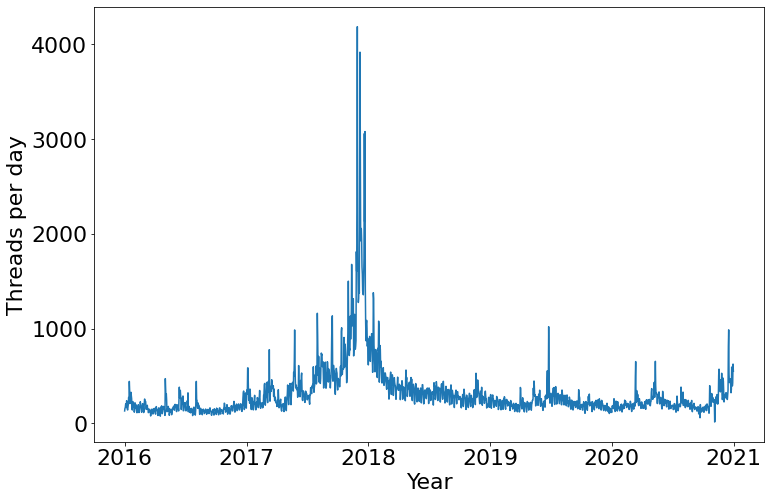

In [30]:
fig = plt.figure(figsize=(12,8))
plt.plot(day_df['New Threads'])
plt.xlabel('Year')
plt.ylabel('Threads per day')

So, what can be learned again? 
- Huge increase in commenting activity that rapidly fell down once the price dropped again. 
- However, a certain baseline stayed throughout the entire time. 
- One could thus think that there is a certain decomposition: people that follow Bitcoin because they are genuinely interested in the topic and people that follow/are active on Bitcoin because they are drawn by the number of tweets etc. 

# What about the threads? How many have a text, how many are only a file or so?

In [31]:
non_del = df[df['text'] != '[deleted]']

In [32]:
(non_del['text'] == 'nan').mean()

0.554713767145705

In [33]:
# Roughly 55% of all of the entries do not have a text, so a lot are just images/videos without an actual text

# If text, what's the length? 

In [34]:
text_df = pd.DataFrame(df[(df['text'] != 'nan') & (df['text'] != '[deleted]') & (df['text'] != '[removed]')]['text'])

In [35]:
text_df['TextLength'] = df['text'].apply(len)

In [36]:
text_df['TextLength'].describe()

count    177277.000000
mean        530.926539
std        1002.179866
min           1.000000
25%         142.000000
50%         288.000000
75%         575.000000
max       39490.000000
Name: TextLength, dtype: float64

Text(0, 0.5, 'Number of threads')

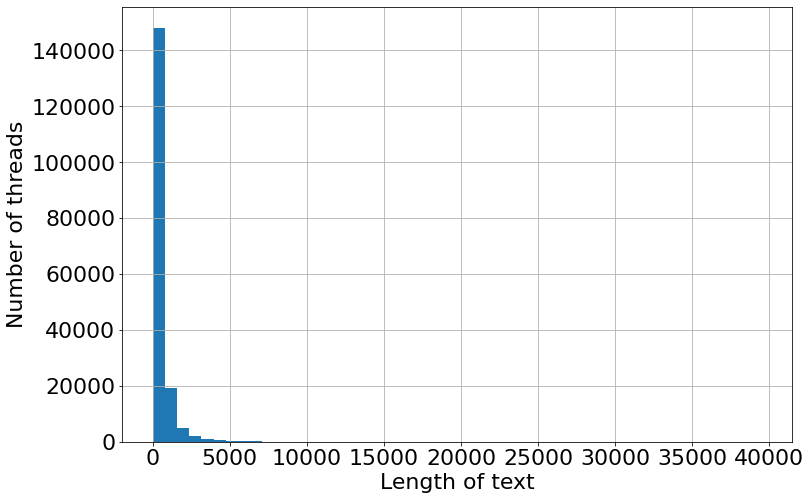

In [37]:
plt.figure(figsize=(12,8))
text_df['TextLength'].hist(bins=50);
plt.xlabel('Length of text');
plt.ylabel('Number of threads')

Very similar pattern again. 
- A lot of very short texts, only in the fewest cases does the text length go up.
- Very skewed distribution. 

# Model Building

In [1]:
# importing 
import statsmodels.api as sm

In [106]:
md = pd.concat((day_df['New Threads'], btc['BPI']), axis=1)
md['T1'] = range(md.shape[0])

def squaring(elem):
    elem = elem ** 2
    return elem

def cubing(elem):
    elem = elem ** 3
    return elem

md['T2'] = md['T1'].apply(squaring)
md['T3'] = md['T1'].apply(cubing)
md_cut = md[md.index<'2020-01-01']
md_cut = sm.add_constant(md_cut)
md_cut

,const,New Threads,BPI,T1,T2,T3
2016-01-01,1.0,132,434.4630,0,0,0
2016-01-02,1.0,160,433.5860,1,1,1
2016-01-03,1.0,169,430.3610,2,4,8
2016-01-04,1.0,203,433.4930,3,9,27
2016-01-05,1.0,208,432.2530,4,16,64
...,...,...,...,...,...,...
2019-12-27,1.0,138,7259.6700,1456,2119936,3086626816
2019-12-28,1.0,159,7313.6933,1457,2122849,3092990993
2019-12-29,1.0,117,7397.5350,1458,2125764,3099363912
2019-12-30,1.0,143,7234.6150,1459,2128681,3105745579


In [139]:
# First Model
ols1 = sm.OLS(md_cut['New Threads'], md_cut[['const', 'BPI']]).fit()
print("Parameters are:\n" + str(ols1.params))
print("\nAIC is euqal to: " + str(ols1.aic))
print("R-Squared is equal to: " + str(ols1.rsquared))
print("\nPvalues are equal to:\n" + str(ols1.pvalues))

Parameters are:
const    144.719502
BPI        0.038995
dtype: float64

AIC is euqal to: 20667.938584911484
R-Squared is equal to: 0.22298335833256433

Pvalues are equal to:
const    1.777488e-32
BPI      5.171193e-82
dtype: float64


In [138]:
# Second Model
ols2 = sm.OLS(md_cut['New Threads'], md_cut[['const', 'BPI', 'T1']]).fit()
print("Parameters are:\n" + str(ols2.params))
print("\nAIC is euqal to: " + str(ols2.aic))
print("R-Squared is equal to: " + str(ols2.rsquared))
print("\nPvalues are equal to:\n" + str(ols2.pvalues))

Parameters are:
const    312.768071
BPI        0.075058
T1        -0.470481
dtype: float64

AIC is euqal to: 20271.105957425174
R-Squared is equal to: 0.4086099917410241

Pvalues are equal to:
const    1.123730e-107
BPI      3.692018e-168
T1        1.593563e-88
dtype: float64


In [137]:
# Third Model
ols3 = sm.OLS(md_cut['New Threads'], md_cut[['const', 'BPI', 'T1', 'T2']]).fit()
print("Parameters are:\n" + str(ols3.params))
print("\nAIC is euqal to: " + str(ols3.aic))
print("R-Squared is equal to: " + str(ols3.rsquared))
print("\nPvalues are equal to:\n" + str(ols3.pvalues))

Parameters are:
const    109.292098
BPI        0.065861
T1         0.428519
T2        -0.000574
dtype: float64

AIC is euqal to: 20078.859406630527
R-Squared is equal to: 0.4822351435004778

Pvalues are equal to:
const     5.876005e-09
BPI      9.076228e-143
T1        9.908353e-11
T2        5.080088e-44
dtype: float64


In [136]:
# Fourth Model
ols4 = sm.OLS(md_cut['New Threads'], md_cut[['const', 'BPI', 'T1', 'T2', 'T3']]).fit()
print("Parameters are:\n" + str(ols4.params))
print("\nAIC is euqal to: " + str(ols4.aic))
print("R-Squared is equal to: " + str(ols4.rsquared))
print("\nPvalues are equal to:\n" + str(ols4.pvalues))

Parameters are:
const    4.414667e+01
BPI      6.669737e-02
T1       9.649506e-01
T2      -1.508453e-03
T3       4.284700e-07
dtype: float64

AIC is euqal to: 20063.692870636147
R-Squared is equal to: 0.488283203232478

Pvalues are equal to:
const     6.962773e-02
BPI      4.972397e-146
T1        3.896292e-11
T2        5.903004e-11
T3        3.542650e-05
dtype: float64


In [135]:
ols4.rsquared

0.488283203232478

In [71]:
lr1.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [41]:
btc['BPI']

0         434.4630
1         433.5860
2         430.3610
3         433.4930
4         432.2530
           ...    
1822    26248.2767
1823    27041.8667
1824    27353.9783
1825    28886.0400
1826    28956.2650
Name: BPI, Length: 1827, dtype: float64

In [52]:
btc.set_index('Date')

,BPI
Date,
2016-01-01,434.4630
2016-01-02,433.5860
2016-01-03,430.3610
2016-01-04,433.4930
2016-01-05,432.2530
...,...
2020-12-27,26248.2767
2020-12-28,27041.8667
2020-12-29,27353.9783
